> ## Formulación del problema.

   #### Este dataset es proporcionado por una organización aérea. El dataset consiste en los detalles de los clientes que ya han volado con esta organización. La devolución del cliente en varios contextos y la información de su vuelo han sido consolidados.
   #### El objetivo de este dataset es predecir si un futuro cliente estará satisfecho con sus servicios dados los detalles de los valores de los otros parámetros.
   #### También la aérolinea necesita saber en que aspecto de los servicios ofrecidos por ellos deben enfatizar mas para generar mayor satisfacción en los clientes.

> ## Recolección de datos

Link: https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airlines-customer-satisfaction/Invistico_Airline.csv


> ## Exploración de datos

In [2]:
data = pd.read_csv("/kaggle/input/airlines-customer-satisfaction/Invistico_Airline.csv")
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
data.shape

(129880, 23)

In [4]:
data.columns.values

array(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'], dtype=object)

In [5]:
data.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [6]:
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [7]:
data[data["Arrival Delay in Minutes"].isna()]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,...,5,5,4,1,4,2,3,5,20,NaN
246,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1364,0,3,0,...,4,2,1,1,3,4,3,2,0,NaN
710,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1792,0,5,0,...,5,5,4,4,5,3,4,5,24,NaN
736,satisfied,Male,Loyal Customer,9,Personal Travel,Eco,1862,0,5,0,...,3,3,5,3,4,4,4,3,0,NaN
818,dissatisfied,Male,Loyal Customer,9,Personal Travel,Eco,1668,1,0,1,...,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,satisfied,Male,Loyal Customer,44,Business travel,Business,3431,2,2,3,...,4,5,5,5,5,5,5,4,70,NaN
128131,satisfied,Male,Loyal Customer,39,Business travel,Business,1595,4,4,4,...,5,5,5,5,5,3,5,5,0,NaN
128710,satisfied,Female,Loyal Customer,45,Business travel,Eco,871,5,1,1,...,2,5,5,5,5,1,5,5,100,NaN
129774,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,1594,5,4,5,...,3,3,1,4,3,3,4,3,0,NaN


In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [10]:
var_num = [col for col in data.columns if data[col].dtypes not in ["object"]]
var_cat = [col for col in data.columns if data[col].dtypes in ["object"]]
len(var_num), len(var_cat)

(18, 5)

### Descripción del dataset
* #### El dataset contiene 129880 filas y 23 columnas/variables, siendo una de ellas la variable objetivo.
* #### Contiene 18 variables numéricas y 5 variables categóricas.
* #### Tiene 393 valores nulos el dataset en la columna "Arrival Delay in Minutes" y no tiene filas duplicadas. 

* #### A las filas que tienen valores nulos en la variable Arrival Delay in Minutes las eliminamos del dataset. 

In [11]:
data = data[data["Arrival Delay in Minutes"].notna()]
var_num = [col for col in data.columns.drop("Arrival Delay in Minutes") if data[col].dtypes not in ["object"]]
var_num

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes']

> ## Exploración de datos.

### Variables independientes numéricas

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
for col in var_num:
    print(col)
    print(data[col].describe())
    print("\n")

Age
count    129487.000000
mean         39.428761
std          15.117597
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64


Flight Distance
count    129487.000000
mean       1981.008974
std        1026.884131
min          50.000000
25%        1359.000000
50%        1924.000000
75%        2543.000000
max        6951.000000
Name: Flight Distance, dtype: float64


Seat comfort
count    129487.000000
mean          2.838586
std           1.392873
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Seat comfort, dtype: float64


Departure/Arrival time convenient
count    129487.000000
mean          2.990277
std           1.527183
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Departure/Arrival time convenient, dtype: float64


Food and drink
count    129487.000

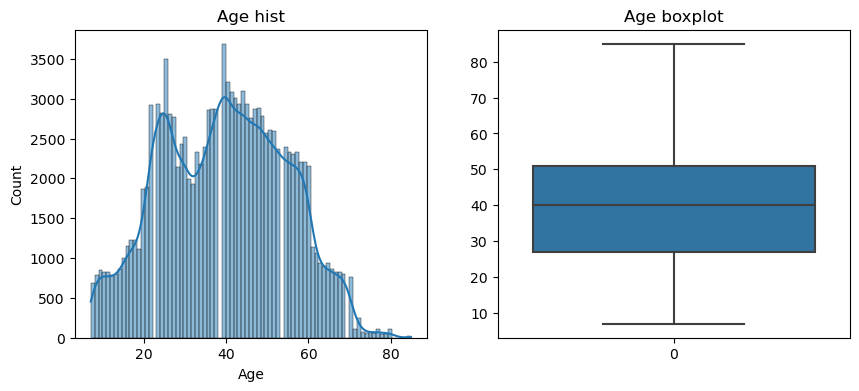

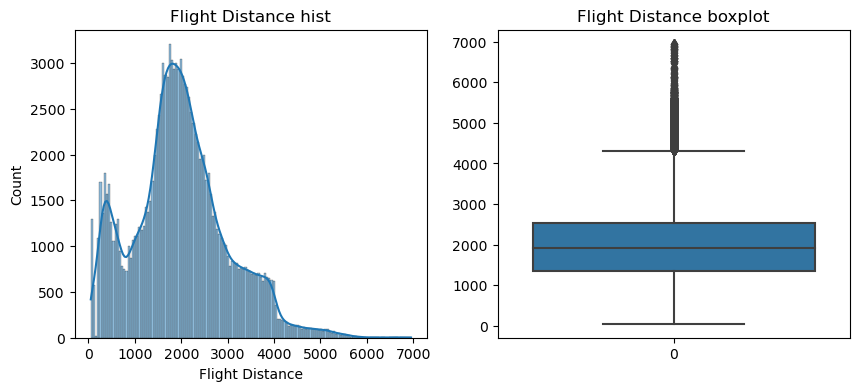

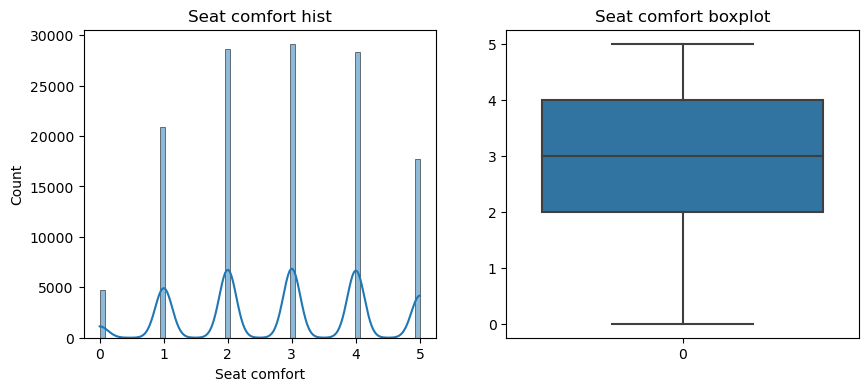

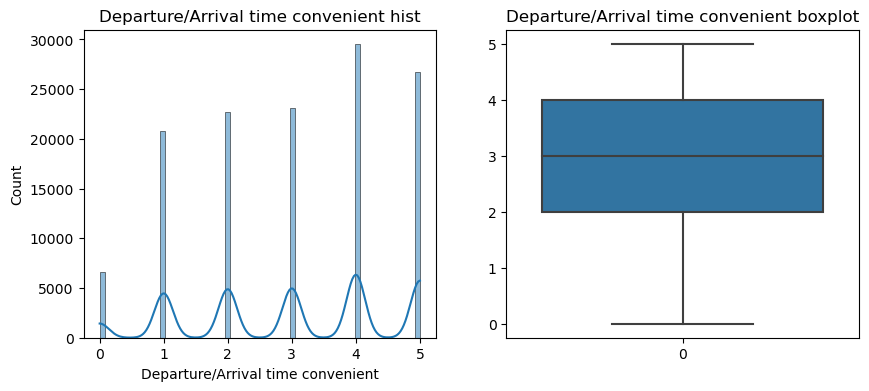

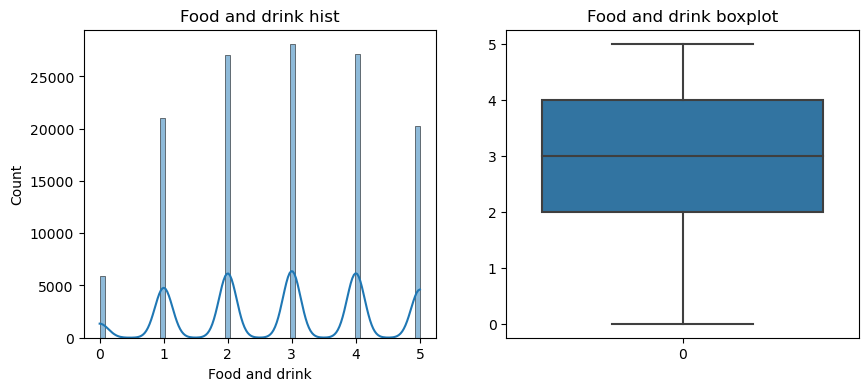

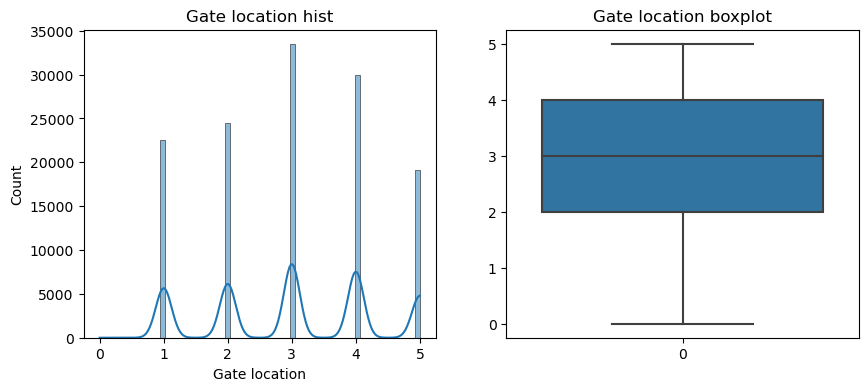

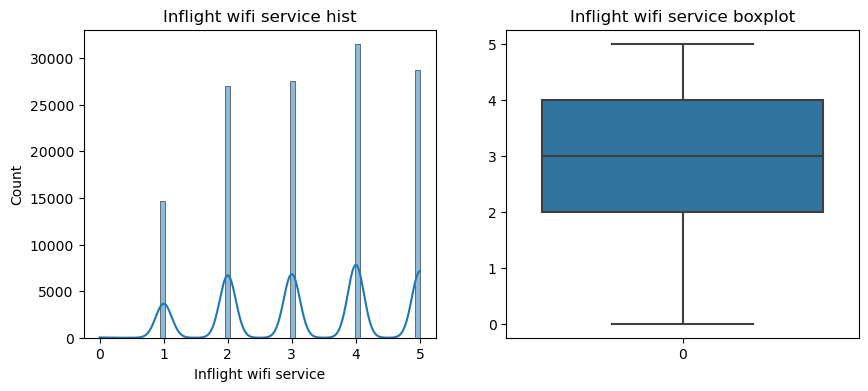

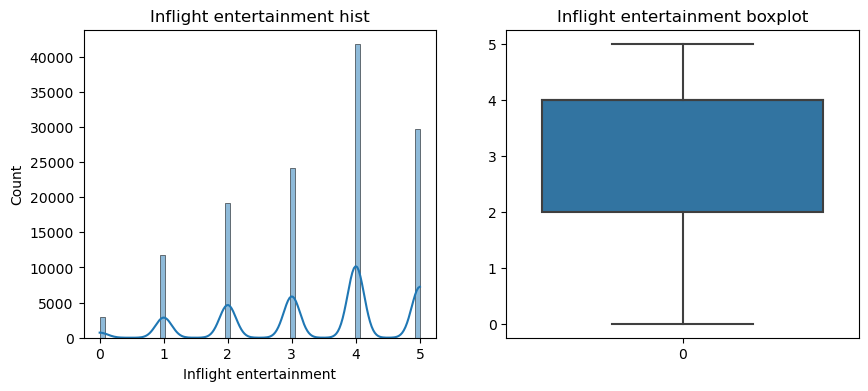

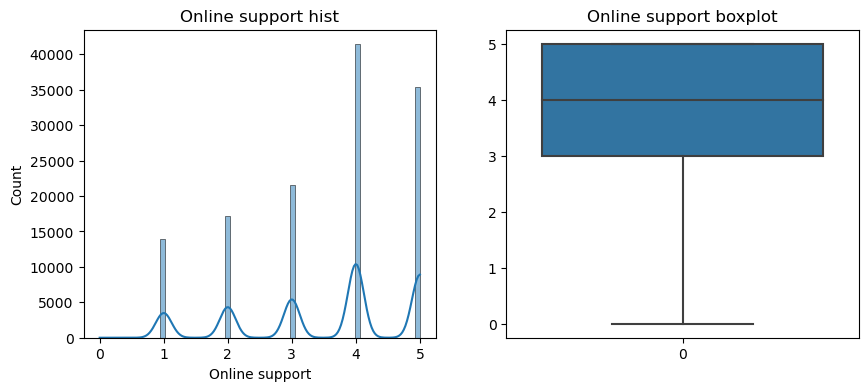

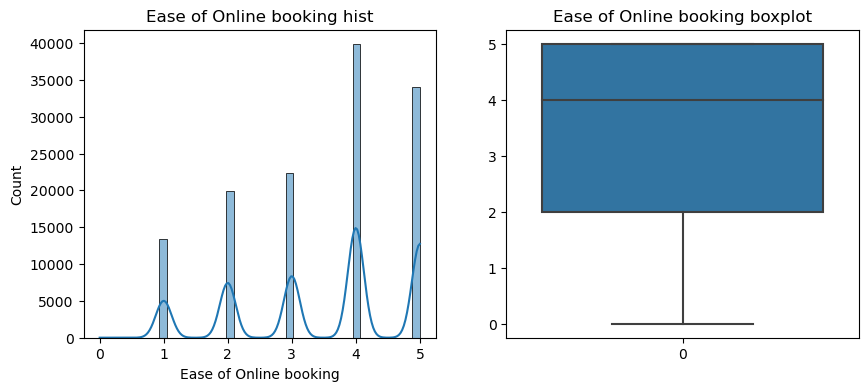

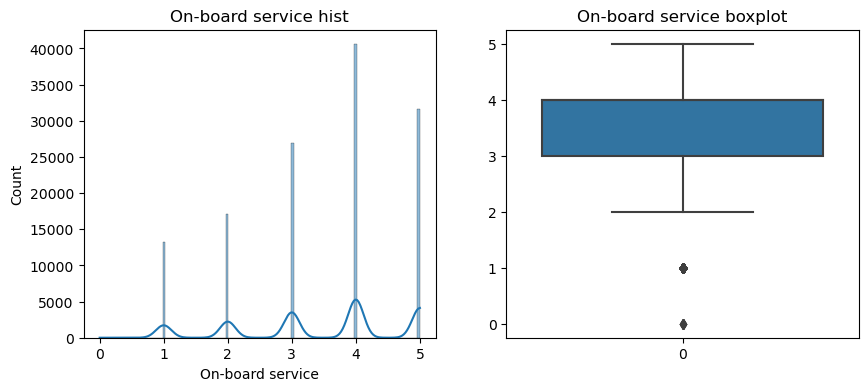

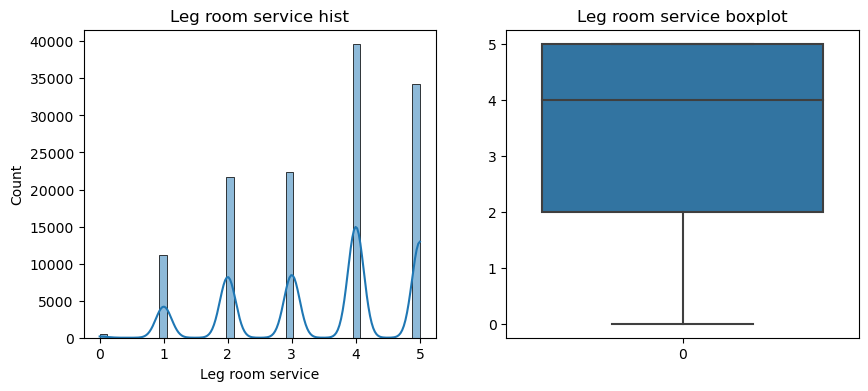

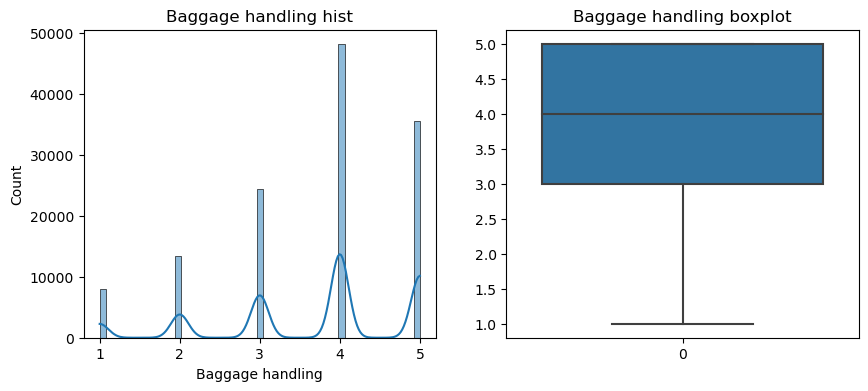

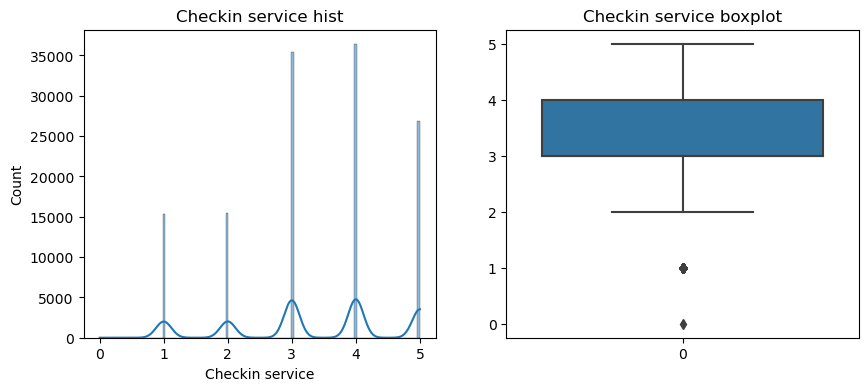

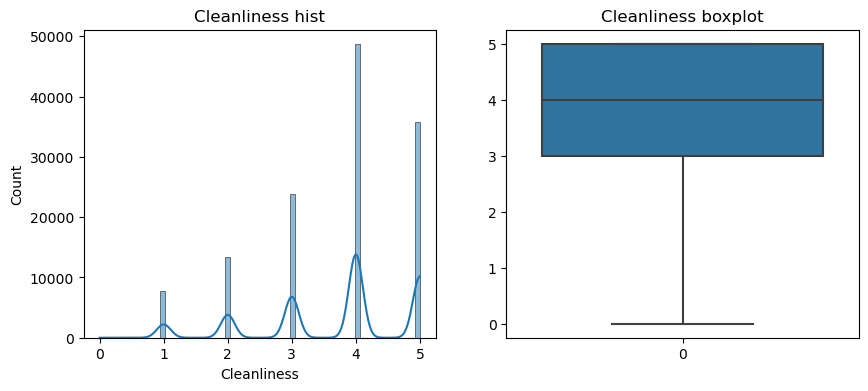

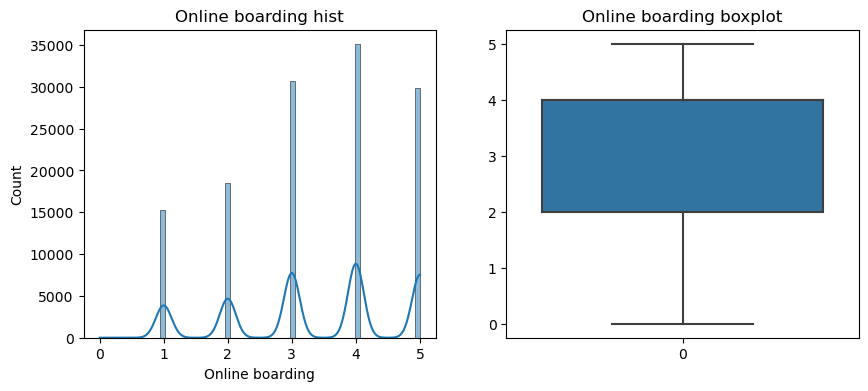

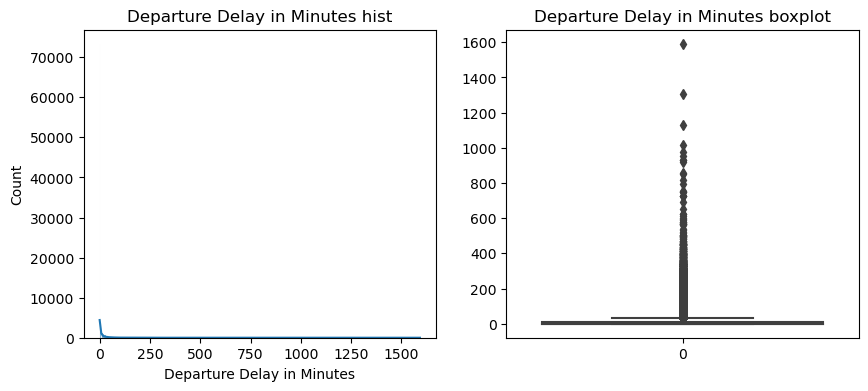

In [14]:
for col in var_num:
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.title(col+" hist")
    
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.title(col+" boxplot")
    
    plt.show()
    

### Variable independiente categórica

In [15]:
for col in var_cat:
    print(data[col].value_counts())
    print()

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64

Female    65703
Male      63784
Name: Gender, dtype: int64

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64



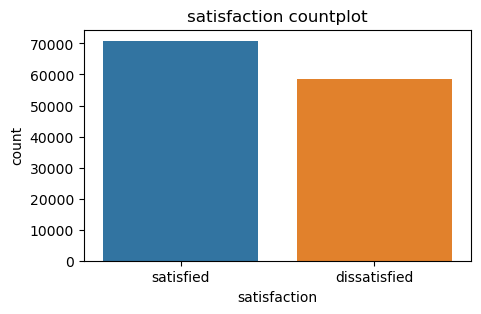

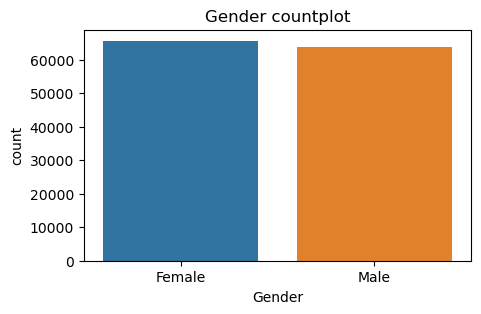

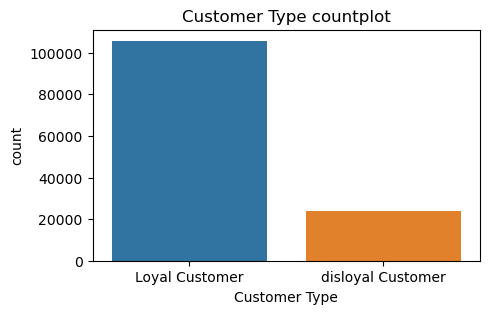

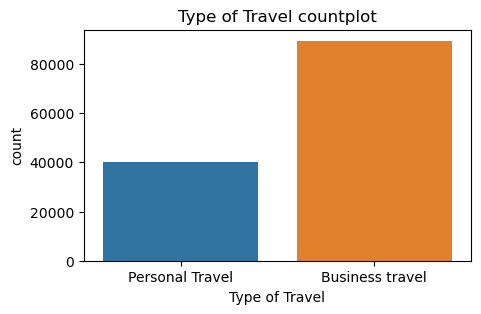

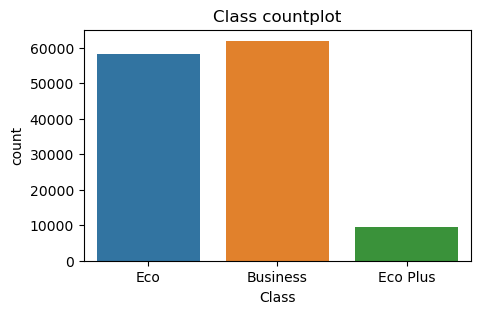

In [16]:
for col in var_cat:
    plt.figure(figsize=(5,3))
    
    sns.countplot(x=data[col])
    plt.title(col+" countplot")
    
    plt.show()

### Variable dependiente (satisfaction)

In [17]:
data[var_num].dtypes

Age                                  int64
Flight Distance                      int64
Seat comfort                         int64
Departure/Arrival time convenient    int64
Food and drink                       int64
Gate location                        int64
Inflight wifi service                int64
Inflight entertainment               int64
Online support                       int64
Ease of Online booking               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Cleanliness                          int64
Online boarding                      int64
Departure Delay in Minutes           int64
dtype: object

In [18]:
pd.DataFrame(data["satisfaction"].value_counts())

,satisfaction
satisfied,70882
dissatisfied,58605


In [19]:
pd.DataFrame(data["satisfaction"].value_counts())/len(data)

,satisfaction
satisfied,0.547406
dissatisfied,0.452594


In [20]:
data_satisfaction = data.groupby("satisfaction")
for col in var_num:
    print(col)
    print(data_satisfaction[col].describe())
    print()

Age
                count       mean        std  min   25%   50%   75%   max
satisfaction                                                            
dissatisfied  58605.0  37.468373  15.884951  7.0  25.0  36.0  49.0  85.0
satisfied     70882.0  41.049604  14.250294  7.0  30.0  42.0  52.0  85.0

Flight Distance
                count         mean          std   min     25%     50%     75%  \
satisfaction                                                                    
dissatisfied  58605.0  2025.202833   887.962558  50.0  1519.0  1954.0  2461.0   
satisfied     70882.0  1944.469640  1127.605582  50.0  1070.0  1885.0  2626.0   

                 max  
satisfaction          
dissatisfied  6951.0  
satisfied     6950.0  

Seat comfort
                count      mean       std  min  25%  50%  75%  max
satisfaction                                                      
dissatisfied  58605.0  2.467315  0.996056  0.0  2.0  2.0  3.0  5.0
satisfied     70882.0  3.145552  1.586096  0.0  2.0  4.

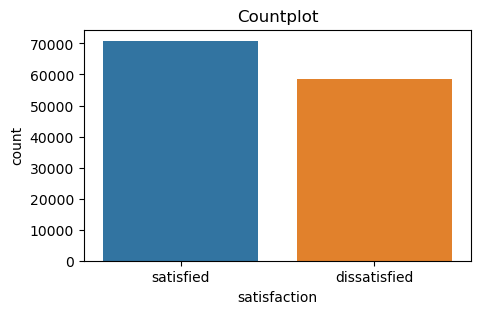

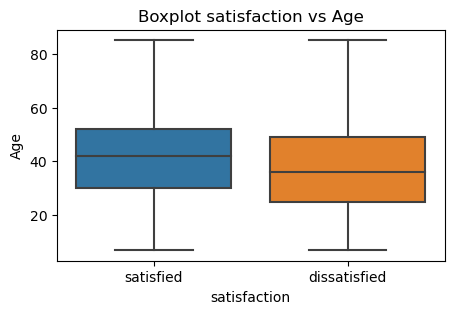

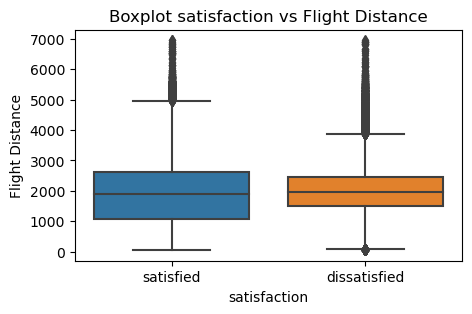

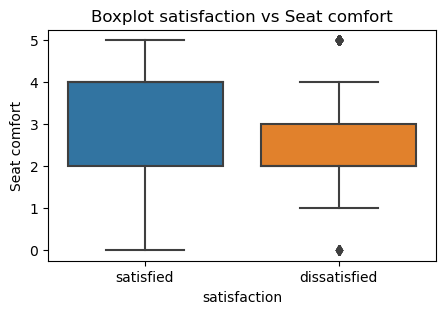

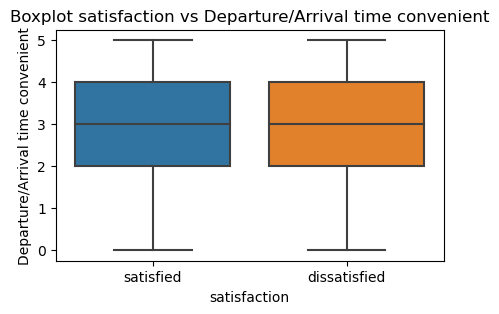

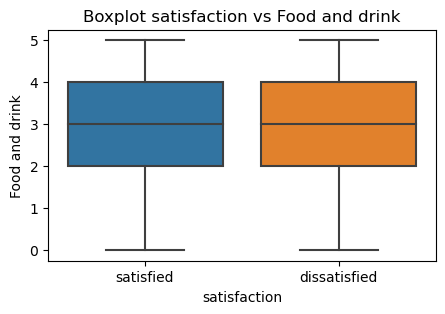

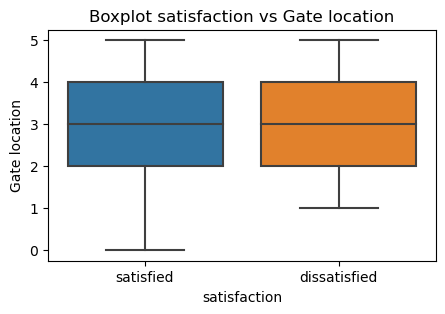

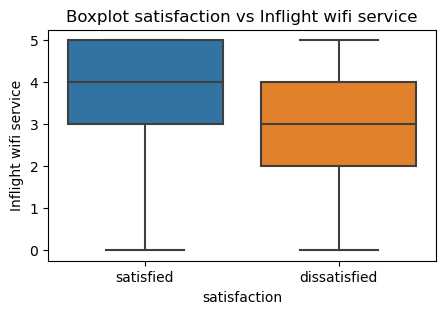

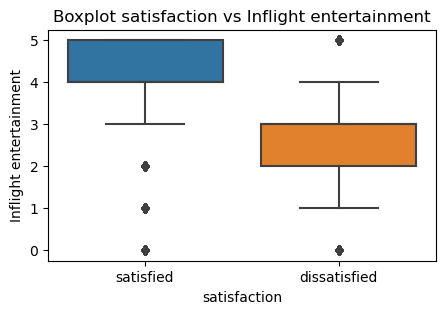

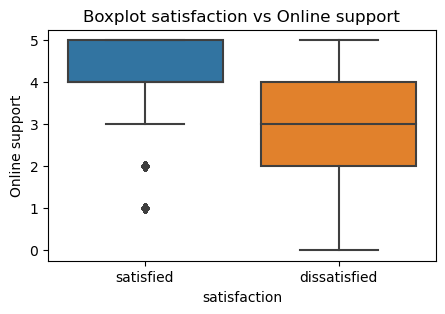

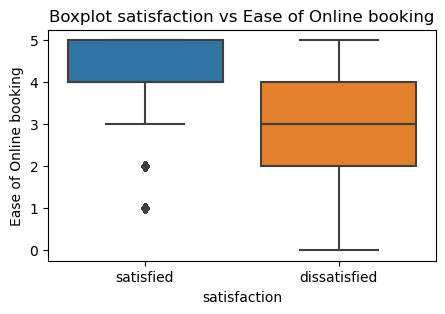

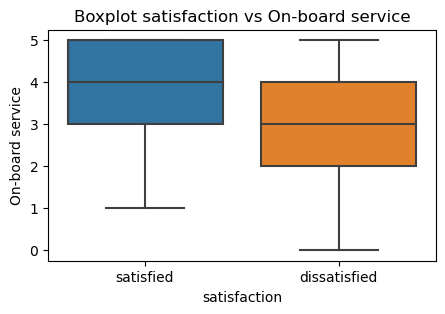

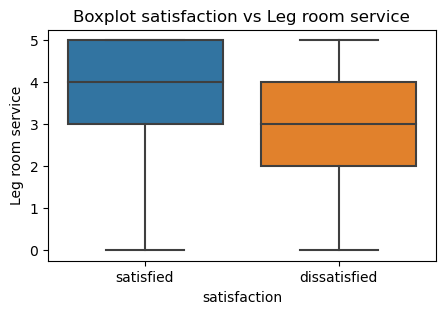

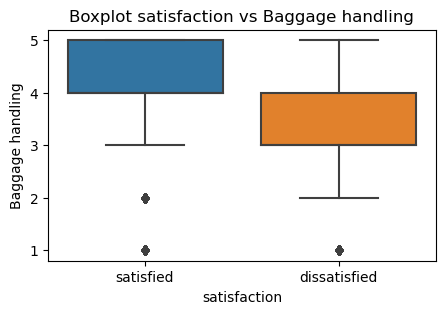

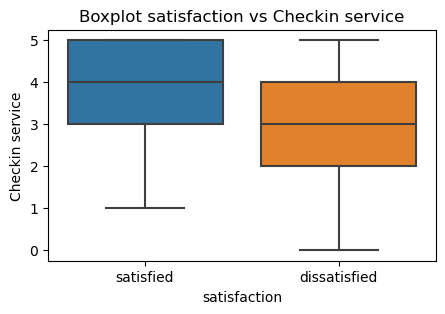

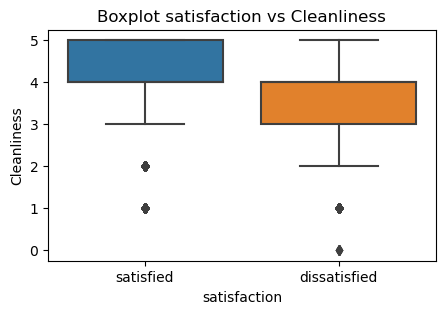

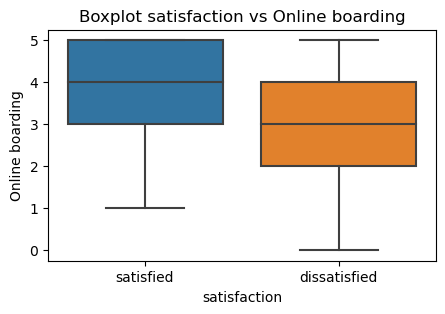

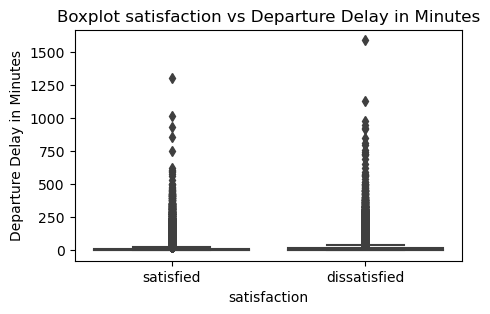

In [21]:
plt.figure(figsize=(5,3))

sns.countplot(x=data["satisfaction"])
plt.title("Countplot")
plt.show()

for col in var_num:
    plt.figure(figsize=(5,3))
    
    sns.boxplot(x=data["satisfaction"],y=data[col])
    plt.title("Boxplot satisfaction vs "+col)
    plt.show

In [22]:
for col in var_cat:
    print(data.groupby(["satisfaction", col]).size())
    print()

satisfaction  satisfaction
dissatisfied  dissatisfied    58605
satisfied     satisfied       70882
dtype: int64

satisfaction  Gender
dissatisfied  Female    22904
              Male      35701
satisfied     Female    42799
              Male      28083
dtype: int64

satisfaction  Customer Type    
dissatisfied  Loyal Customer       40579
              disloyal Customer    18026
satisfied     Loyal Customer       65194
              disloyal Customer     5688
dtype: int64

satisfaction  Type of Travel 
dissatisfied  Business travel    37238
              Personal Travel    21367
satisfied     Business travel    52207
              Personal Travel    18675
dtype: int64

satisfaction  Class   
dissatisfied  Business    18013
              Eco         35219
              Eco Plus     5373
satisfied     Business    43977
              Eco         22898
              Eco Plus     4007
dtype: int64



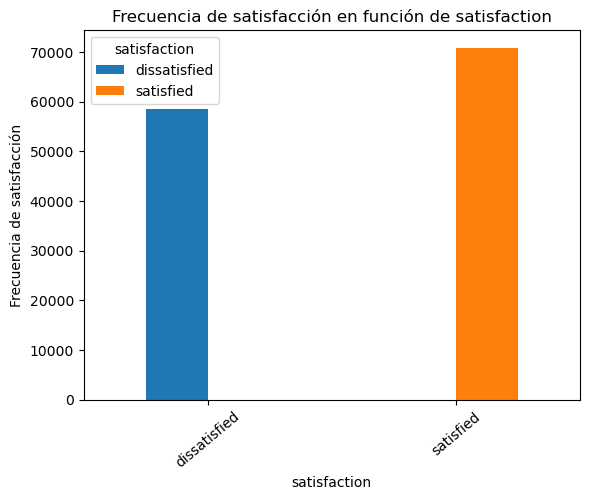

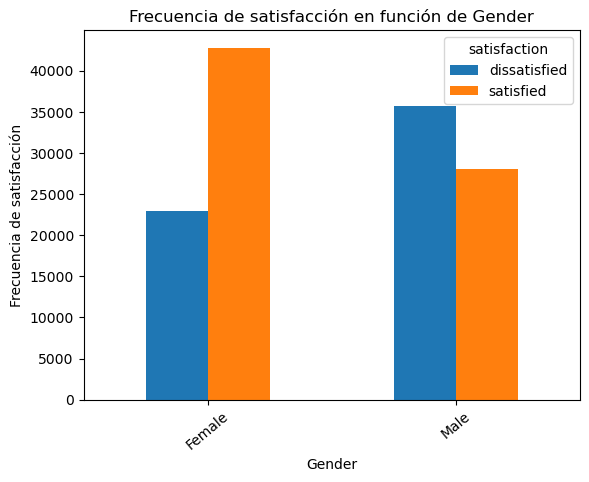

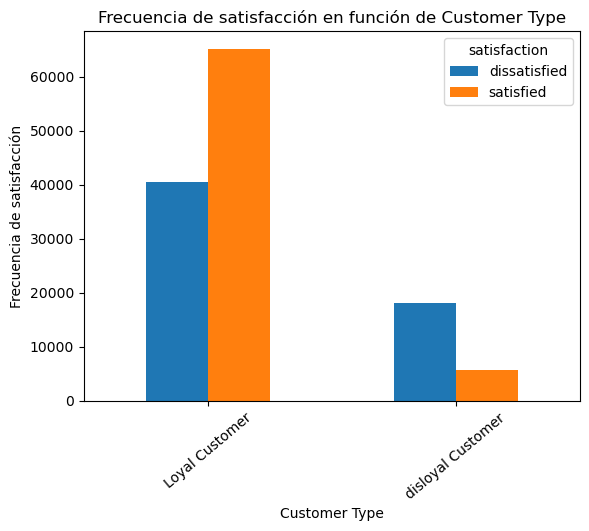

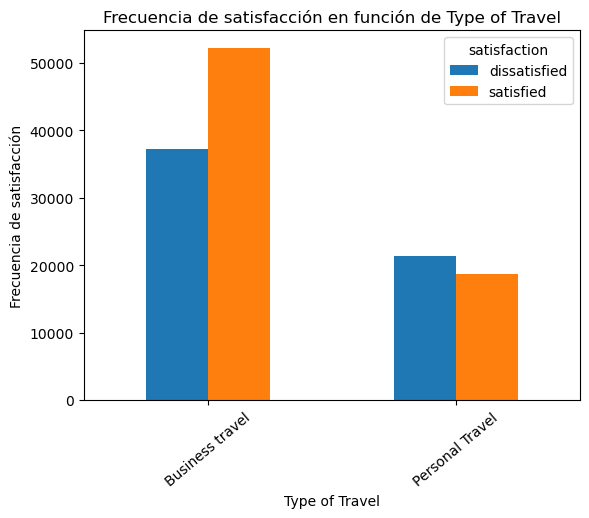

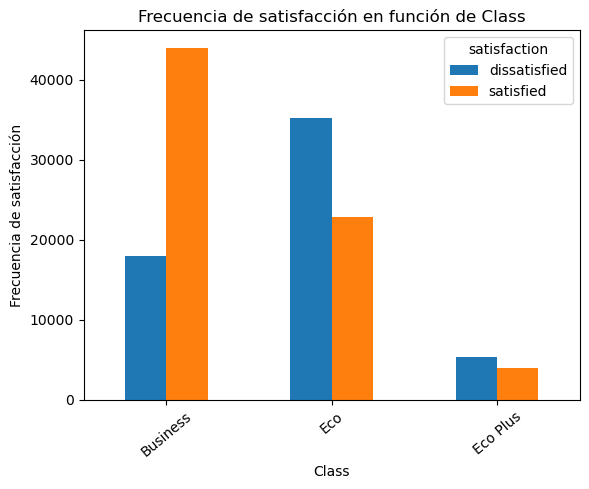

In [23]:
for col in var_cat:
    crosstab_col = pd.crosstab(data[col], data["satisfaction"])
    
    crosstab_col.plot.bar()
    plt.title("Frecuencia de satisfacción en función de "+col)
    plt.xlabel(col)
    plt.ylabel("Frecuencia de satisfacción")
    plt.xticks(rotation=40)    

### Descripción variable dependiente
* #### Del total de los datos hay 70882 clientes satisfechos con el servicio (el 0.547406% quedó satisfecho con el servicio).
* #### Del total de los datos hay 58605 clientes que no quedaron satisfechos con el servicio (el 0.452594% quedó insatisfecho con el servicio).


> ## Preprocesado de datos

In [24]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [25]:
var_cat.pop(0)
var_cat

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [26]:
data["satisfaction"].replace({"satisfied":1
                              ,"dissatisfied":0},
                            inplace = True)
data.head(3)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0


In [27]:
for col in var_cat:
    data[col] = data[col].str.split(" ").str.join("_")
    var_dummies = pd.get_dummies(data[col],prefix=col,
                                 drop_first=True)
    data = pd.concat([data, var_dummies],axis=1)
    data.drop([col],axis=1,inplace=True)
data.head()

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal_Customer,Type of Travel_Personal_Travel,Class_Eco,Class_Eco_Plus
0,1,65,265,0,0,0,2,2,4,2,...,5,3,2,0,0.0,0,0,1,1,0
1,1,47,2464,0,0,0,3,0,2,2,...,2,3,2,310,305.0,1,0,1,0,0
2,1,15,2138,0,0,0,3,2,0,2,...,4,4,2,0,0.0,0,0,1,1,0
3,1,60,623,0,0,0,3,3,4,3,...,4,1,3,0,0.0,0,0,1,1,0
4,1,70,354,0,0,0,3,4,3,4,...,4,2,5,0,0.0,0,0,1,1,0


> ## Construcción del modelo

### Selección  de rasgos

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [29]:
X = data[data.columns.drop("satisfaction")]
Y = data["satisfaction"]
Y

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129487, dtype: int64

In [30]:
lr = LogisticRegression(solver="liblinear")

In [31]:
for n in range(1,10):
    rfe = RFE(lr, n_features_to_select=n)
    rfe = rfe.fit(X,Y)
    
    print(rfe.support_)
    print()
    
    var_select = pd.DataFrame(list(zip(X,rfe.support_,
                                       rfe.ranking_)))
    
    print(var_select)
    print()

[False False False False False False False False False False False False
 False False False False False False False  True False False False]

                                    0      1   2
0                                 Age  False  21
1                     Flight Distance  False  23
2                        Seat comfort  False  10
3   Departure/Arrival time convenient  False  13
4                      Food and drink  False  11
5                       Gate location  False  16
6               Inflight wifi service  False  19
7              Inflight entertainment  False   5
8                      Online support  False  18
9              Ease of Online booking  False   6
10                   On-board service  False   8
11                   Leg room service  False  12
12                   Baggage handling  False  15
13                    Checkin service  False   9
14                        Cleanliness  False  17
15                    Online boarding  False  14
16         Departure Dela

In [32]:
var_select[var_select[2]==1]

,0,1,2
7,Inflight entertainment,True,1
9,Ease of Online booking,True,1
10,On-board service,True,1
13,Checkin service,True,1
18,Gender_Male,True,1
19,Customer Type_disloyal_Customer,True,1
20,Type of Travel_Personal_Travel,True,1
21,Class_Eco,True,1
22,Class_Eco_Plus,True,1


In [33]:
X_new = data[var_select[var_select[2]==1][0].unique()]
X_new.head()

,Inflight entertainment,Ease of Online booking,On-board service,Checkin service,Gender_Male,Customer Type_disloyal_Customer,Type of Travel_Personal_Travel,Class_Eco,Class_Eco_Plus
0,4,3,3,5,0,0,1,1,0
1,2,3,4,2,1,0,1,0,0
2,0,2,3,4,0,0,1,1,0
3,4,1,1,4,0,0,1,1,0
4,3,2,2,4,0,0,1,1,0


### División de datos en datos de entrenamiento y datos de prueba.

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X_new,Y,
                                                    test_size=0.3,
                                                    random_state=0)

In [35]:
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

> ## Evaluación del modelo

In [36]:
lr.score(x_test,y_test)

0.8242335315468375

In [37]:
from sklearn import metrics

In [38]:
probs = lr.predict_proba(x_test)
probs

array([[0.99636391, 0.00363609],
       [0.06339918, 0.93660082],
       [0.38892336, 0.61107664],
       ...,
       [0.04506092, 0.95493908],
       [0.91147113, 0.08852887],
       [0.63848741, 0.36151259]])

In [39]:
prob = probs[:,1]
threshold = 0.5
prob_df = pd.DataFrame(prob)
prob_df["prediction"] = np.where(prob_df[0]>threshold,1,0)
prob_df["actual"] = list(y_test)
prob_df.head()

,0,prediction,actual
0,0.003636,0,0
1,0.936601,1,1
2,0.611077,1,0
3,0.963344,1,1
4,0.894651,1,1


In [40]:
print("El "+str(metrics.accuracy_score(y_test, prob_df["prediction"])*100)+" % de los casos coinciden")

El 82.42335315468375 % de los casos coinciden


In [41]:
prob_df["prediction"].value_counts()

1    21477
0    17370
Name: prediction, dtype: int64

In [42]:
print("El %.2f son marcados como posibles clientes satisfechos"%float(prob_df["prediction"].value_counts()[1]/len(prob_df)))


El 0.55 son marcados como posibles clientes satisfechos


### Validación cruzada

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
scores = cross_val_score(LogisticRegression(),
                         X_new,Y,
                         scoring="accuracy",
                         cv=10)
print(scores)
print(scores.mean())

[0.70932118 0.91759981 0.58267048 0.5432852  0.892038   0.89520426
 0.86670785 0.90345999 0.79170528 0.63654618]
0.773853824322042


### Matrices de confusión y curvas ROC.

In [45]:
confusion_matrix = pd.crosstab(prob_df["prediction"],
                              prob_df["actual"])
confusion_matrix

actual,0,1
prediction,,
0,14040,3330
1,3498,17979


In [46]:
TP = confusion_matrix[1][1]
TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0]
FP = confusion_matrix[0][1]
print("TP: "+str(TP)+"\n"
     "TN: "+str(TN)+"\n"
     "FP: "+str(FP)+"\n"
     "FN: "+str(FN)+"\n"
)

TP: 17979
TN: 14040
FP: 3498
FN: 3330



In [47]:
sens = TP/(TP+FN)
espec_1 = 1-(TN/(TN+FP))
print("Tasa de verdaderos positivos: %.2f"%sens)
print("Tasa de falsos positivos: %.2f"%espec_1)

Tasa de verdaderos positivos: 0.84
Tasa de falsos positivos: 0.20


In [48]:
threshold = [0.04, 0.05, 0.08, 0.10, 0.12, 0.18, 0.20, 0.25, 0.30, 0.40]
sensitivities = [1]
especifities_1 = [1]

for t in threshold:
    prob_df["prediction"] = np.where(prob_df[0]>=t,1,0)
    prob_df["actual"] = list(y_test)
    
    confusion_matrix = pd.crosstab(prob_df["prediction"],
                                  prob_df["actual"])
    
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FN = confusion_matrix[1][0]
    FP = confusion_matrix[0][1]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espec_1 = 1-(TN/(TN+FP))
    especifities_1.append(espec_1)
    
sensitivities.append(0)
especifities_1.append(0)

In [49]:
sensitivities

[1,
 0.9865784410343047,
 0.983293444084659,
 0.9740485240977991,
 0.9690271716176263,
 0.9637242479703412,
 0.9488009761133793,
 0.9449528368295087,
 0.9303111361396593,
 0.9161856492561828,
 0.8840396076775071,
 0]

In [50]:
especifities_1

[1,
 0.8740449310069563,
 0.8413159995438476,
 0.7472345763485004,
 0.6947200364921884,
 0.6500171057133082,
 0.5371764169232524,
 0.5037062378834531,
 0.42878321359334015,
 0.36874215988140036,
 0.26930094651613634,
 0]

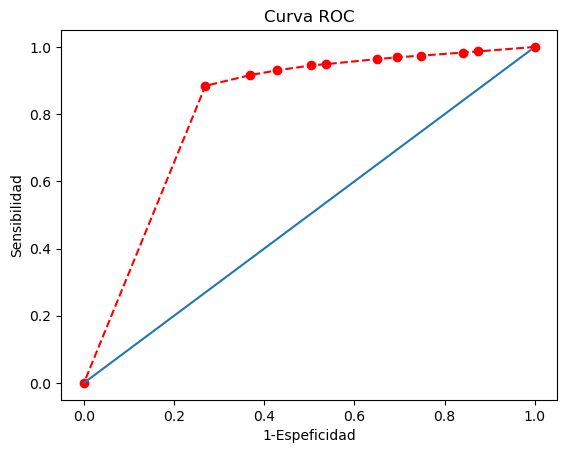

In [51]:
plt.plot(especifities_1,sensitivities,marker="o",
        linestyle="--",color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Espeficidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")
plt.show()

> ## Corrección del modelo

### Implementaré un modelo aumentando el número de variables.

In [52]:
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X,Y)

print(rfe.support_)
print()

var_select = pd.DataFrame(list(zip(X,rfe.support_,
                                   rfe.ranking_)))

var_select

[False False  True  True  True False False  True False  True  True  True
  True  True False  True False False  True  True  True  True  True]



,0,1,2
0,Age,False,7
1,Flight Distance,False,9
2,Seat comfort,True,1
3,Departure/Arrival time convenient,True,1
4,Food and drink,True,1
5,Gate location,False,2
6,Inflight wifi service,False,5
7,Inflight entertainment,True,1
8,Online support,False,4
9,Ease of Online booking,True,1


In [53]:
X_new = data[var_select[var_select[2]==1][0].unique()]
X_new.head()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight entertainment,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Gender_Male,Customer Type_disloyal_Customer,Type of Travel_Personal_Travel,Class_Eco,Class_Eco_Plus
0,0,0,0,4,3,3,0,3,5,2,0,0,1,1,0
1,0,0,0,2,3,4,4,4,2,2,1,0,1,0,0
2,0,0,0,0,2,3,3,4,4,2,0,0,1,1,0
3,0,0,0,4,1,1,0,1,4,3,0,0,1,1,0
4,0,0,0,3,2,2,0,2,4,5,0,0,1,1,0


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X_new,Y,
                                                    test_size=0.3,
                                                    random_state=0)

In [55]:
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [56]:
lr.score(x_test,y_test)

0.8350194352202229

In [57]:
scores = cross_val_score(LogisticRegression(),
                         X_new,Y,
                         scoring="accuracy",
                         cv=10)
print(scores)
print(scores.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.70654105 0.92539964 0.60159086 0.53486756 0.88732721 0.90308132
 0.88192138 0.94084028 0.81147668 0.63083102]
0.7823876990344932


In [58]:
probs = lr.predict_proba(x_test)
prob = probs[:,1]
prob_df = pd.DataFrame(prob)

threshold = [0.04, 0.05, 0.08, 0.10, 0.12, 0.18, 0.20, 0.25, 0.30, 0.40]
sensitivities = [1]
especifities_1 = [1]

for t in threshold:
    prob_df["prediction"] = np.where(prob_df[0]>=t,1,0)
    prob_df["actual"] = list(y_test)
    
    confusion_matrix = pd.crosstab(prob_df["prediction"],
                                  prob_df["actual"])
    
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FN = confusion_matrix[1][0]
    FP = confusion_matrix[0][1]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espec_1 = 1-(TN/(TN+FP))
    especifities_1.append(espec_1)
    
sensitivities.append(0)
especifities_1.append(0)

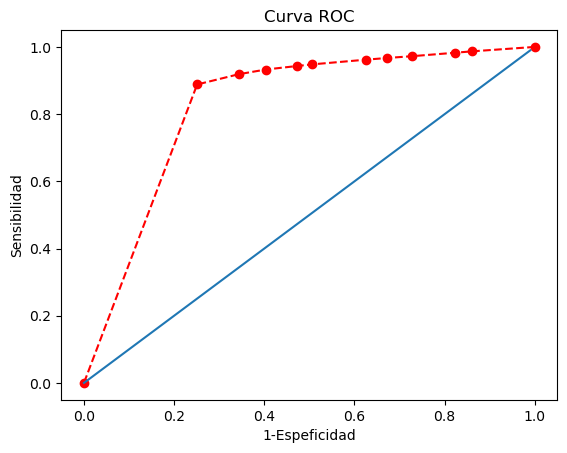

In [59]:
plt.plot(especifities_1,sensitivities,marker="o",
        linestyle="--",color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Espeficidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")
plt.show()